# **NOVACK RENATO BORGES**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Projeto de Ciência de Dados**

Qual propabilidade de pessoas agendadas possuirem hipertensão?


### **Importar as bibliotecas**

In [2]:

import pandas as pd 
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import joblib
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
# Método para avaliar a acurácia dos modelos
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
%matplotlib inline

### **Processamento, Tratamento e Análise Exploratória dos Dados**

In [4]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KaggleV2-May-2016.csv')

In [5]:
# conhecer o formato do nosso dataframe
df.shape

(110527, 14)

**Dicionário de Dados:**



*   Genero: Masculo (M) Feminino (F)
*   Dia do agendamento: Dia da solicitação de atendimento
*   Dia agendado: Dia agendado para consulta
*   Idade: Idade do paciente
*   Bairro: Bairro onde mora
*   Bolsade Estudods: Classificação (0 ou 1 - 0 não / 1 sim)
*   Hipertensão: Classificação (0 ou 1 - 0 não é hipertenso / 1 é hipertenso)
*   Diabetes: Classificação (0 ou 1 - 0 não diabético / 1 diabético )
*   Alcolismo: Classificação (0 ou 1 - 0 não / 1 sim)
*   Deficiancia: Classificação (0 ou 1 - 0 não / 1  sim)


In [6]:
# Queremos entender as primeiras linhas do nosso df
# Podemos escolher a quantidade de linhas que queremos ver
# Observe a quantidade de colunas que nosso df possui
# head = cabeça (primeiras linhas do df)
df.head()

,PacienteId,EncontroID,Genero,DiadoAgendamento,DiaAgendado,Idade,Bairro,BolsadeEstudos,Hipertensao,Diabetes,Alcolismo,Deficiencia,SMS_recebido,Nao_mostrado
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Também podemos investigar quais são os valores das últimas linhas do nosso df
# head = rabo (últimas linhas do df)
df.tail()

,PacienteId,EncontroID,Genero,DiadoAgendamento,DiaAgendado,Idade,Bairro,BolsadeEstudos,Hipertensao,Diabetes,Alcolismo,Deficiencia,SMS_recebido,Nao_mostrado
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df.columns

Index(['PacienteId', 'EncontroID', 'Genero', 'DiadoAgendamento', 'DiaAgendado',
       'Idade', 'Bairro', 'BolsadeEstudos', 'Hipertensao', 'Diabetes',
       'Alcolismo', 'Deficiencia', 'SMS_recebido', 'Nao_mostrado'],
      dtype='object')

In [ ]:
df.isnull().values.any()

False

In [ ]:
# Informações gerais sobre o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   PacienteId        110527 non-null  float64
 1   EncontroID        110527 non-null  int64  
 2   Genero            110527 non-null  object 
 3   DiadoAgendamento  110527 non-null  object 
 4   DiaAgendado       110527 non-null  object 
 5   Idade             110527 non-null  int64  
 6   Bairro            110527 non-null  object 
 7   BolsadeEstudos    110527 non-null  int64  
 8   Hipertensao       110527 non-null  int64  
 9   Diabetes          110527 non-null  int64  
 10  Alcolismo         110527 non-null  int64  
 11  Deficiencia       110527 non-null  int64  
 12  SMS_recebido      110527 non-null  int64  
 13  Nao_mostrado      110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
# describe = medidas estatísticas básicas do df
df.describe()

,PacienteId,EncontroID,Idade,BolsadeEstudos,Hipertensao,Diabetes,Alcolismo,Deficiencia,SMS_recebido
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
# Quantidade de casos de Diabetes (outcomes)
df['Hipertensao'].value_counts()

0    88726
1    21801
Name: Hipertensao, dtype: int64

In [ ]:
# Usar a biblioteca SWEETVIZ para fazer EDA
# Para instalar o pacote sweetviz
!pip install sweetviz
# Importando o pacote
import sweetviz as sv
#Utilizando
analise = sv.analyze(df)
analise.show_html('Hipertensao.html')

     |████████████████████████████████| 15.1MB 243kB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


                                             |          | [  0%]   00:00 -> (? left)

Report Hipertensao.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
def plot_corr(df, size=7):
  corr= df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

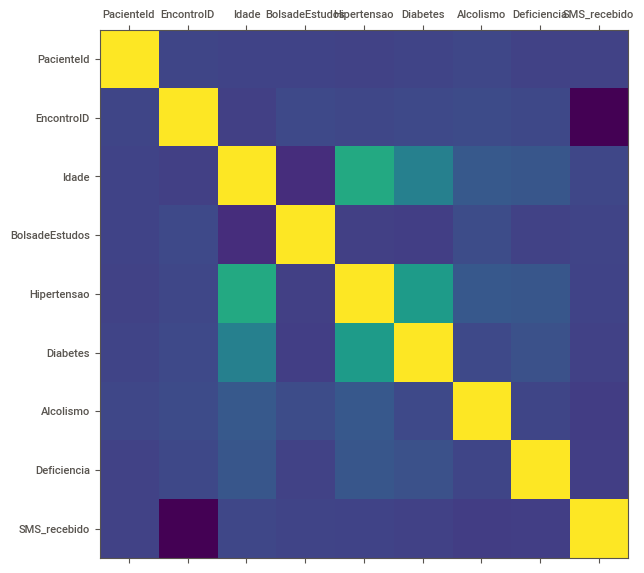

In [ ]:
plot_corr(df)

In [ ]:
df.corr()

,PacienteId,EncontroID,Idade,BolsadeEstudos,Hipertensao,Diabetes,Alcolismo,Deficiencia,SMS_recebido
PacienteId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
EncontroID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Idade,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
BolsadeEstudos,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertensao,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcolismo,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Deficiencia,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_recebido,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [ ]:
# Outra maneira de avaliar a coorelação entre as variáveis
import seaborn as sns
sns.set(color_codes=True)
cor=df.corr()
cor

,PacienteId,EncontroID,Idade,BolsadeEstudos,Hipertensao,Diabetes,Alcolismo,Deficiencia,SMS_recebido
PacienteId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
EncontroID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Idade,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
BolsadeEstudos,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertensao,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcolismo,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Deficiencia,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_recebido,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


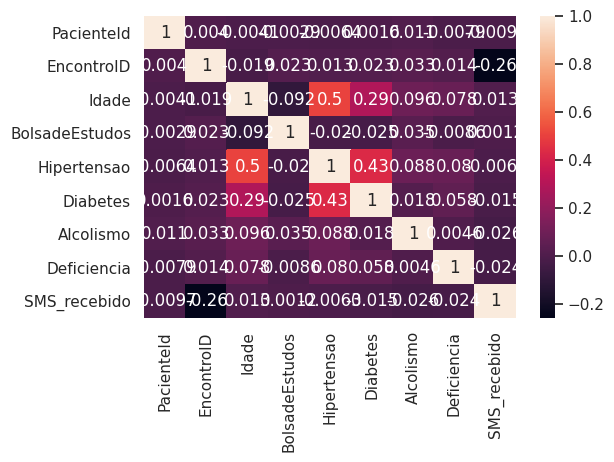

In [ ]:
# Matriz de Correlação
sns.heatmap(cor,annot=True)

In [ ]:
num_true = len(df.loc[df['Hipertensao'] == True])
num_false = len(df.loc[df['Hipertensao'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 21801 (19.72%)
Número de Casos Falsos     : 88726 (80.28%)


### **Dividir o Banco de Dados**

Para melhorar a análise, vamos dividir nosso banco de dados em 2: 

1.   Banco de dados de treino
2.   Banco de dados de teste

In [ ]:
import sklearn as sk
sk.__version__

'0.22.2.post1'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
atributos = ['PacienteId', 'EncontroID',
       'Idade', 'BolsadeEstudos', 'Hipertensao', 'Diabetes',
       'Alcolismo', 'Deficiencia', 'SMS_recebido']

In [ ]:
atributos_prev= ['Hipertensao']

In [ ]:
X = df[atributos].values
y = df[atributos_prev].values

In [ ]:
X

array([[2.98724998e+13, 5.64290300e+06, 6.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.58997777e+14, 5.64250300e+06, 5.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.26296230e+12, 5.64254900e+06, 6.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.55766317e+13, 5.63069200e+06, 2.10000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.21349314e+13, 5.63032300e+06, 3.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.77511518e+14, 5.62944800e+06, 5.40000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
y

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
split_test_size = 0.20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [ ]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

80.00% nos dados de treino
20.00% nos dados de teste


In [ ]:
X_treino

array([[1.32849153e+12, 5.68761000e+06, 2.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.88186930e+14, 5.69448400e+06, 6.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.11899152e+12, 5.50093900e+06, 6.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.97344272e+11, 5.76286400e+06, 3.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.62349349e+14, 5.63995100e+06, 1.80000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.82113116e+14, 5.63759300e+06, 9.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

### **Verificar o split dos dados**

In [ ]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['Hipertensao'] == 1]), 
                                               (len(df.loc[df['Hipertensao'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Hipertensao'] == 0]), 
                                               (len(df.loc[df['Hipertensao'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 21801 (19.72%)
Original False : 88726 (80.28%)

Training True : 17513 (19.81%)
Training False : 70908 (80.19%)

Test True : 4288 (19.40%)
Test False : 17818 (80.60%)


### **Valores Missing Ocultos**

In [ ]:
df.isnull().values.any()

False

In [ ]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing Idade: {0}".format(len(df.loc[df['Idade'] == 0])))
print("# Linhas missing Diabetes: {0}".format(len(df.loc[df['Diabetes'] == 0])))
print("# Linhas missing Alcolismo: {0}".format(len(df.loc[df['Alcolismo'] == 0])))
print("# Linhas missing Deficiencia: {0}".format(len(df.loc[df['Deficiencia'] == 0])))
print("# Linhas missing SMS: {0}".format(len(df.loc[df['SMS_recebido'] == 0])))

# Linhas no dataframe 110527
# Linhas missing Idade: 3539
# Linhas missing Diabetes: 102584
# Linhas missing Alcolismo: 107167
# Linhas missing Deficiencia: 108286
# Linhas missing SMS: 75045


### **Tratando dados missing**

Imputação de dados: substituindo os valores zerados pela média dos dados.

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
preenche_0 = SimpleImputer(missing_values = 0, strategy = "mean")
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

In [ ]:
X_treino

array([[1.32849153e+12, 5.68761000e+06, 2.50000000e+01, ...,
        1.00000000e+00, 1.10000000e+00, 1.00000000e+00],
       [3.88186930e+14, 5.69448400e+06, 6.20000000e+01, ...,
        1.00000000e+00, 1.10000000e+00, 1.00000000e+00],
       [9.11899152e+12, 5.50093900e+06, 6.50000000e+01, ...,
        1.00000000e+00, 1.10000000e+00, 1.00000000e+00],
       ...,
       [4.97344272e+11, 5.76286400e+06, 3.80000000e+01, ...,
        1.00000000e+00, 1.10000000e+00, 1.00000000e+00],
       [2.62349349e+14, 5.63995100e+06, 1.80000000e+01, ...,
        1.00000000e+00, 1.10000000e+00, 1.00000000e+00],
       [1.82113116e+14, 5.63759300e+06, 9.00000000e+00, ...,
        1.00000000e+00, 1.10000000e+00, 1.00000000e+00]])

# **Resultados**

### **Modelo de Regressão Logística**

In [ ]:
# implementar o modelo
modelo_lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_lr.fit(X_treino, Y_treino.ravel())
y_forecast_lr = modelo_lr.predict(X_teste)

In [ ]:
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_score(Y_teste, y_forecast_lr)*100}')
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_lr, labels = [1, 0]))

Acurácia do Modelo de Regressão Logística: 80.60255134352664

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4288
           0       0.81      1.00      0.89     17818

    accuracy                           0.81     22106
   macro avg       0.40      0.50      0.45     22106
weighted avg       0.65      0.81      0.72     22106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Multilayer Perceptron (MLP)**

In [ ]:
# Building MLP model
modelo_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 10), random_state=1)

# Training MLP model
modelo_mlp.fit(X_treino, Y_treino)

# Testing MLP model
y_forecast_mlp = modelo_mlp.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_score(Y_teste, y_forecast_mlp)*100}')
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_mlp, labels = [1, 0]))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia do Modelo de Regressão Logística: 80.60255134352664

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4288
           0       0.81      1.00      0.89     17818

    accuracy                           0.81     22106
   macro avg       0.40      0.50      0.45     22106
weighted avg       0.65      0.81      0.72     22106



### **KNN (K nearest neighbor)**

In [ ]:
# Building KNN model with 5 neighbors (K=5)
modelo_KNN = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model
modelo_KNN.fit(X_treino, Y_treino)

# Testing the KNN model
y_forecast_KNN = modelo_KNN.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, y_forecast_KNN)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_KNN, labels = [1, 0]))

Exatidão (Accuracy): 0.8144

Classification Report
              precision    recall  f1-score   support

           1       0.53      0.37      0.44      4288
           0       0.86      0.92      0.89     17818

    accuracy                           0.81     22106
   macro avg       0.70      0.65      0.66     22106
weighted avg       0.80      0.81      0.80     22106



### **Decision Tree**

In [ ]:
# Building Tree model 
modelo_tree = DecisionTreeClassifier(random_state=1)

# Training the Tree model
modelo_tree.fit(X_treino, Y_treino)

# Testing the Tree model
y_forecast_tree = modelo_tree.predict(X_teste)

In [ ]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, y_forecast_tree)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_tree, labels = [1, 0]))

Exatidão (Accuracy): 0.8405

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.60      0.59      4288
           0       0.90      0.90      0.90     17818

    accuracy                           0.84     22106
   macro avg       0.75      0.75      0.75     22106
weighted avg       0.84      0.84      0.84     22106



### **Classificador Naive Bayes**

In [ ]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Criando o modelo preditivo
modelo_NB = GaussianNB()

# Treinando o modelo
modelo_NB.fit(X_treino, Y_treino.ravel())


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn import metrics
y_forecast_NB = modelo_NB.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, y_forecast_NB)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, y_forecast_NB, labels = [1, 0]))

Exatidão (Accuracy): 0.8060

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4288
           0       0.81      1.00      0.89     17818

    accuracy                           0.81     22106
   macro avg       0.40      0.50      0.45     22106
weighted avg       0.65      0.81      0.72     22106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Comparando a acurácia (exatidão) dos modelos**

In [ ]:
# Comparing models accuracy
print(f'Acurácia do Modelo MLP: {accuracy_score(Y_teste, y_forecast_mlp)*100}')
print(f'Acurácia do Modelo KNN: {accuracy_score(Y_teste, y_forecast_KNN)*100}')
print(f'Acurácia do Modelo Decision Tree: {accuracy_score(Y_teste, y_forecast_tree)*100}')
print(f'Acurácia do Modelo NB: {accuracy_score(Y_teste, y_forecast_NB)*100}')
print(f'Acurácia do Modelo de Regressão Logística: {accuracy_score(Y_teste, y_forecast_lr)*100}')


Acurácia do Modelo MLP: 80.60255134352664
Acurácia do Modelo KNN: 81.44395186827106
Acurácia do Modelo Decision Tree: 84.05410295847281
Acurácia do Modelo NB: 80.60255134352664
Acurácia do Modelo de Regressão Logística: 80.60255134352664


### **Previsões com o modelo treinado!**

In [ ]:
import pickle

In [ ]:
filename = 'modelo_lr_treinado.sav'
pickle.dump(y_forecast_lr, open(filename, 'wb'))

In [ ]:
X_teste

array([[2.75957453e+13, 5.75641700e+06, 2.00000000e+01, ...,
        1.00000000e+00, 1.08616780e+00, 1.00000000e+00],
       [9.67319364e+14, 5.52315900e+06, 3.70000000e+01, ...,
        1.00000000e+00, 1.08616780e+00, 1.00000000e+00],
       [3.95164144e+12, 5.69308000e+06, 3.80000000e+01, ...,
        1.00000000e+00, 1.08616780e+00, 1.00000000e+00],
       ...,
       [8.51726432e+11, 5.56802600e+06, 2.20000000e+01, ...,
        1.00000000e+00, 1.08616780e+00, 1.00000000e+00],
       [6.33883673e+14, 5.63794500e+06, 3.90000000e+01, ...,
        1.00000000e+00, 1.08616780e+00, 1.00000000e+00],
       [7.93951990e+12, 5.71501700e+06, 3.00000000e+00, ...,
        1.00000000e+00, 1.08616780e+00, 1.00000000e+00]])